<a href="https://colab.research.google.com/github/IrinaBallesteros/Data-Science-and-Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN

Clustering con Python y scikit-learn

# Importar librerias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import DBSCAN
from sklearn.metrics import  silhouette_score

# preparando datos de prueba

In [ ]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)

In [ ]:
X_m, y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
)

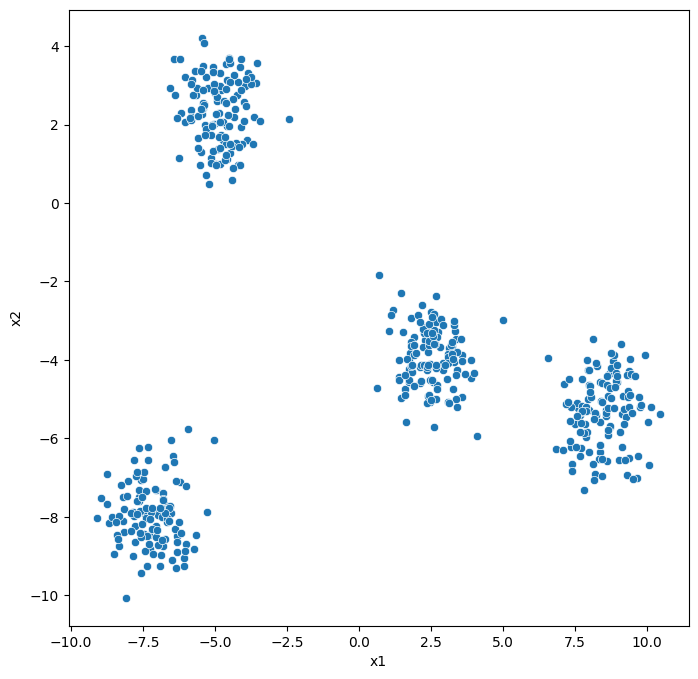

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', marker='X', s =100)
plt.plot()
plt.show()

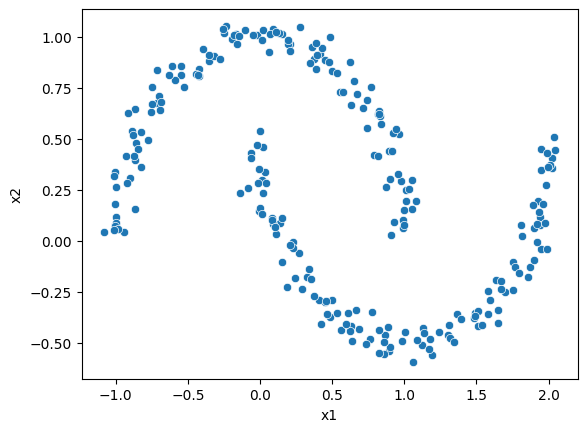

In [ ]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

# Implementando DBSCAN

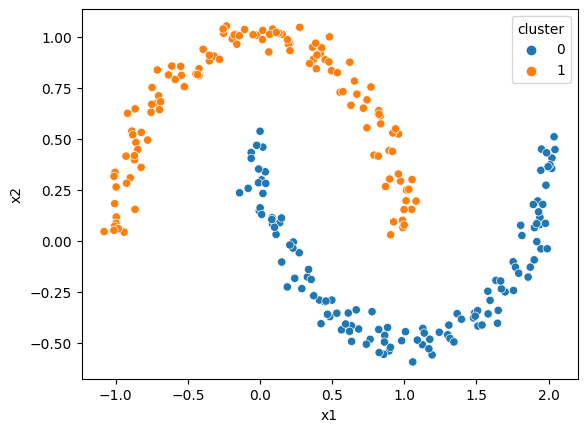

In [10]:
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)
y_m_predict = dbscan_cluster.fit_predict(X_m)
df_moons['cluster'] = y_m_predict
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()


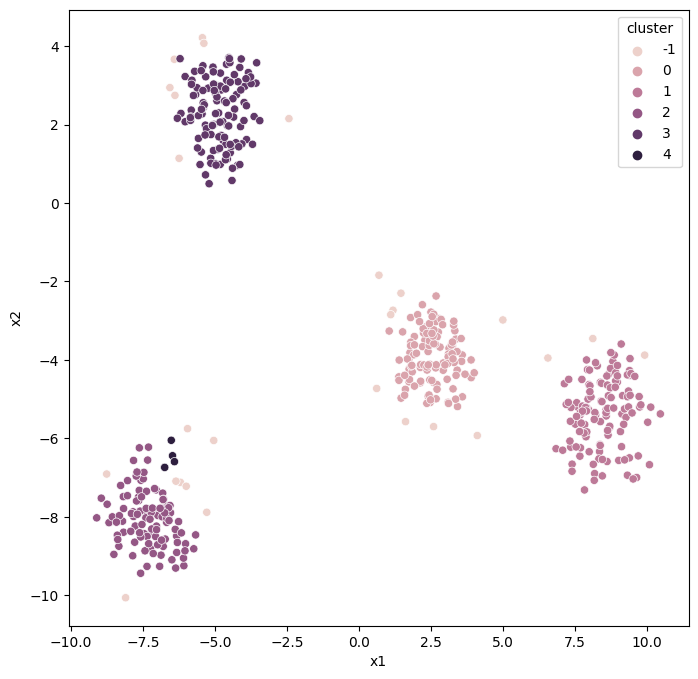

In [12]:
dbscan = DBSCAN(eps=0.5, min_samples=4)
y_predict = dbscan.fit_predict(X)
df_blobs['cluster'] = y_predict

fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()


# Hiperparametros

In [13]:
from sklearn.neighbors import NearestNeighbors

In [15]:
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

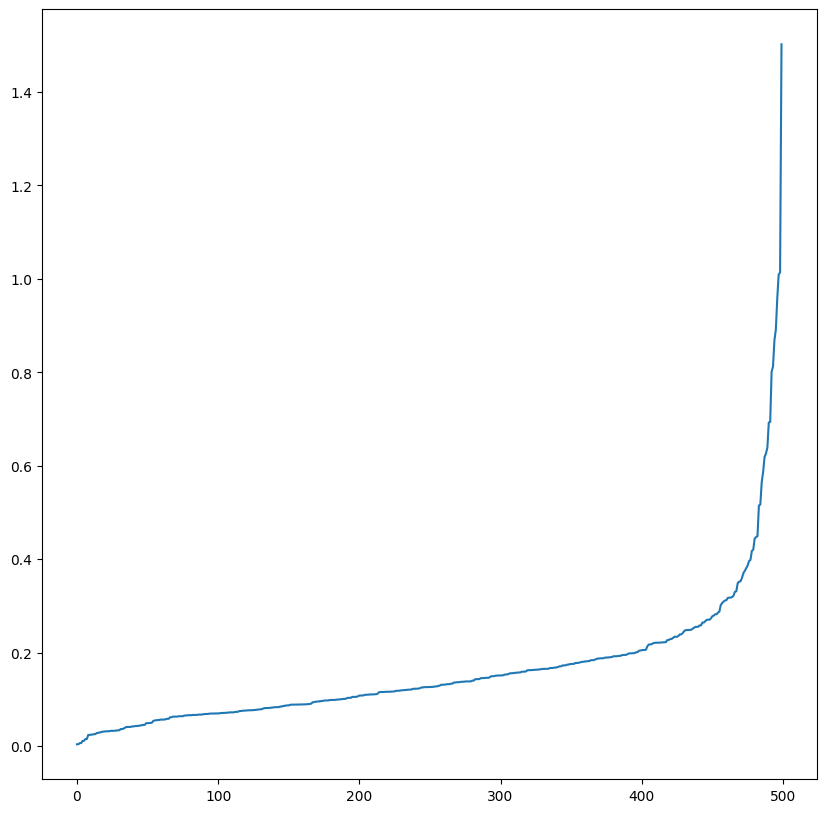

In [16]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

fig = plt.figure(figsize=(10,10))
plt.plot(distances)

In [17]:
eps_values = np.arange(0.25, 0.8, 0.10)
min_samples = np.arange(2,10)

In [18]:
from itertools import product

In [19]:
dbscan_paramns = list(product(eps_values,min_samples))
sil_scores = []

for p in dbscan_paramns:
  y_pred = DBSCAN(eps= p[0], min_samples=p[1]).fit_predict(X)
  sil_scores.append(silhouette_score(X,y_pred))

In [20]:
df_paramns_tunning = pd.DataFrame.from_records(dbscan_paramns, columns = ['Eps', 'Min_Samples'])
df_paramns_tunning['sil_scores'] = sil_scores

In [21]:
pivot_data = pd.pivot_table(df_paramns_tunning, values='sil_scores', index='Min_Samples', columns='Eps')

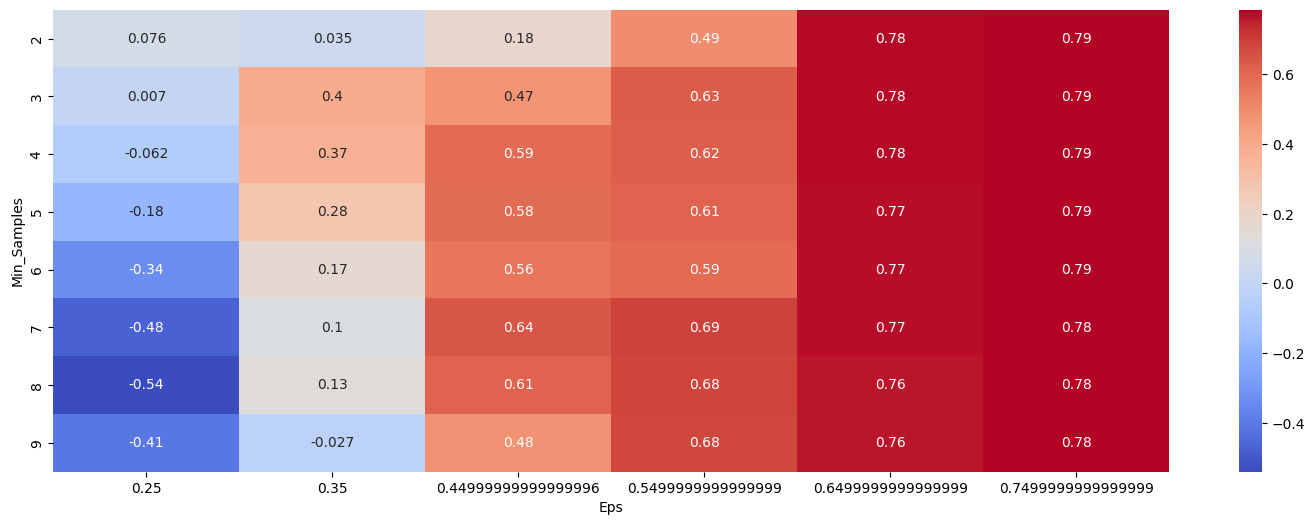

In [22]:
fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_data, annot=True, annot_kws={'size':10}, cmap='coolwarm', ax = ax)
plt.show()

# Evaluacion de DBSCAN

In [23]:
dbscan_cluster = DBSCAN(eps=0.5, min_samples=3)
y_predict = dbscan_cluster.fit_predict(X)
df_blobs['cluster'] = y_predict

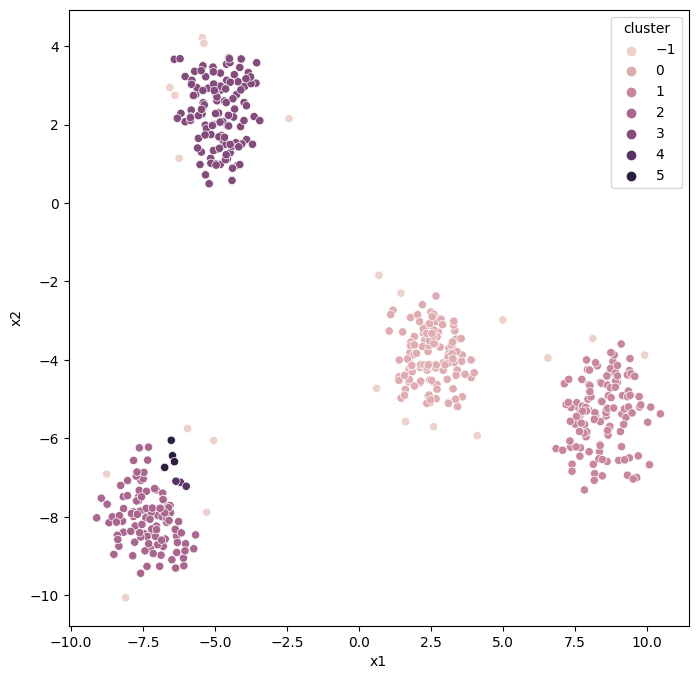

In [24]:
fig = plt.figure(figsize=(8,8))
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

For n_clusters = 7 The average silhouette_Score is : 0.5908610282726394


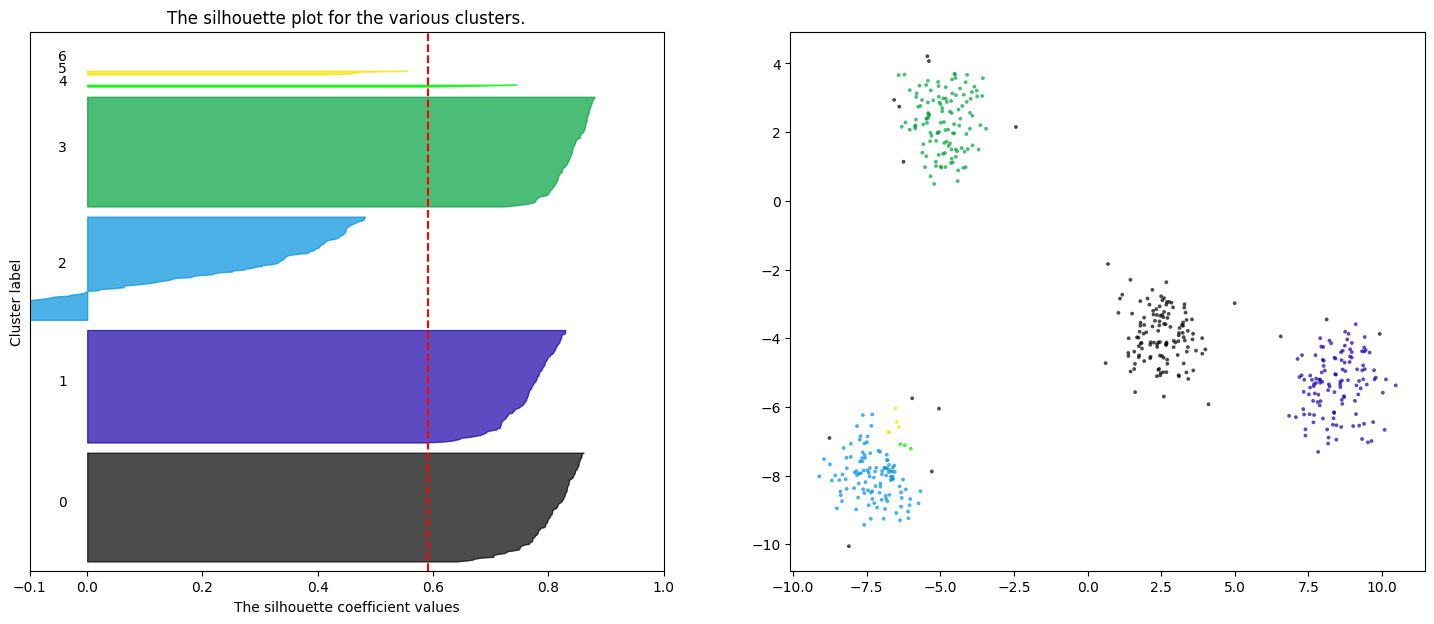

In [30]:
from seaborn._core.properties import LineStyle
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)


ax1.set_xlim([-0.1, 1])


clusterer = DBSCAN(eps=0.5, min_samples=3)
cluster_labels = clusterer.fit_predict(X)
n_clusters = len(np.unique(cluster_labels))

ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])



silhouette_avg = silhouette_score(X, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_Score is :",
    silhouette_avg,
)

sample_silhouette_values =silhouette_samples(X, cluster_labels)
y_lower = 10
for i in range(n_clusters):

  ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels ==i]
  ith_cluster_silhouette_values.sort()
  size_cluster_i = ith_cluster_silhouette_values.shape[0]
  y_upper = y_lower + size_cluster_i
  color = cm.nipy_spectral(float(i) / n_clusters)
  ax1.fill_betweenx(
      np.arange(y_lower, y_upper),
      0,
      ith_cluster_silhouette_values,
      facecolor=color,
      edgecolor=color,
      alpha=0.7,
  )

  ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

  y_lower = y_upper + 10

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_yticks([])
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:,0], X[:,1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

plt.show()